# Polynomial Regression

## Importing the libraries

In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

## Importing the dataset

In [13]:
data = pd.read_csv("Position_Salaries.csv")
inputs = data.iloc[:,1:-1].values
targets = data.iloc[:,-1].values

We are not splitting the data into test and train sets because we do not have enough data. We also are not encoding the first column because the second column does that for us. 


## Training the Linear Regression model on the whole dataset

In [14]:
from sklearn.linear_model import LinearRegression
linRegressor = LinearRegression()
linRegressor.fit(inputs,targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [42]:
from sklearn.preprocessing import PolynomialFeatures
polyReg = PolynomialFeatures(degree = 4)
polyInputs = polyReg.fit_transform(inputs)
linReg2 = LinearRegression()
linReg2.fit(polyInputs,targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

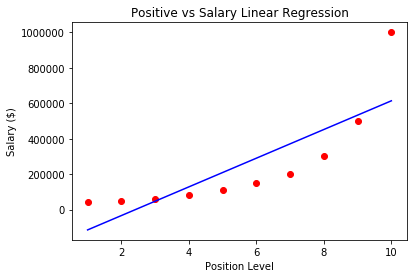

In [29]:
plt.scatter(inputs,targets, color = 'red')
plt.plot(inputs,linRegressor.predict(inputs),color='blue')
plt.title("Positive vs Salary Linear Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary ($)")
plt.show()

## Measuring Performance of Simple Linear Regression

In [74]:
rmse = round(np.sqrt(mean_squared_error(targets, linRegressor.predict(inputs))),2)
r2 = round(r2_score(targets, linRegressor.predict(inputs)),4)
print("The model performance for the Simple Linear Regression")
print("-------------------------------------------")
print(f"RMSE of Simple Linear Regression is {rmse}")
print(f"R2 score of training set is {r2}")


The model performance for the Simple Linear Regression
-------------------------------------------
RMSE of Simple Linear Regression is 163388.74
R2 score of training set is 0.669


## Visualising the Polynomial Regression results

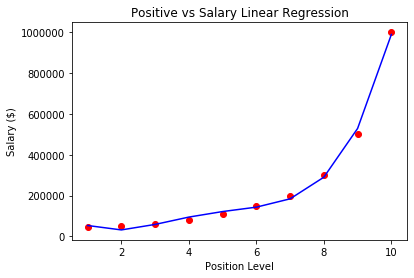

In [43]:
## Overfit but it is okay because we want the exact prediction for 
## position 6.5 for the probl
plt.scatter(inputs,targets, color = 'red')
plt.plot(inputs,linReg2.predict(polyInputs),color='blue')
plt.title("Positive vs Salary Linear Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary ($)")
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

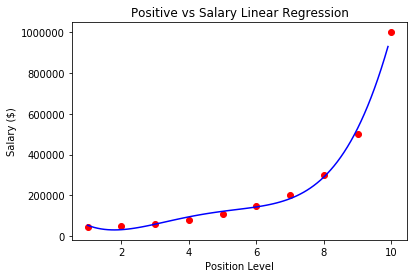

In [50]:
x_grid = np.arange(min(inputs),max(inputs),.1).reshape(len(x_grid),1)
xGridFit = polyReg.fit_transform(x_grid)
plt.scatter(inputs,targets, color = 'red')
plt.plot(x_grid,linReg2.predict(xGridFit),color='blue')
plt.title("Positive vs Salary Linear Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary ($)")
plt.show()

## Measuring Performance of Polynomial Linear Regression

In [97]:
rmse = round(np.sqrt(mean_squared_error(targets, linReg2.predict(polyInputs))),2)
r2 = round(r2_score(targets, linReg2.predict(polyInputs)),4)
print("The model performance for the Polynomial Linear Regression")
print("-------------------------------------------")
print(f"RMSE of Polynomial Linear Regression is {rmse}")
print(f"R2 score of training set is {r2}")


The model performance for the Polynomial Linear Regression
-------------------------------------------
RMSE of Polynomial Linear Regression is 14503.23
R2 score of training set is 0.9974


## Predicting a new result with Linear Regression

In [105]:
print(f'Predicted salary of position 6.5 with \n Simple Linear Regression: ${round(linRegressor.predict([[6.5]])[0],2)}')

Predicted salary of position 6.5 with 
 Simple Linear Regression: $330378.79


## Predicting a new result with Polynomial Regression

In [102]:
polyPredict = polyReg.fit_transform([[6.5]])
print(f'Predicted salary of position 6.5 with \n Polynomial Linear Regression: ${round(linReg2.predict(polyPredict)[0],2)}')


Predicted salary of position 6.5 with 
 Polynomial Linear Regression: $158862.45
